In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb
import imblearn

# Read and sanitize the data
df = pd.read_excel("../data/UG_HH_NEW_continuous_no200_train.xls")
drop_cols = ['prop', 'other_prop', 'other_resp']
df = df[[col for col in df if col not in drop_cols]]

In [2]:
from utils.preprocessing import df_to_xydf, df_to_xy

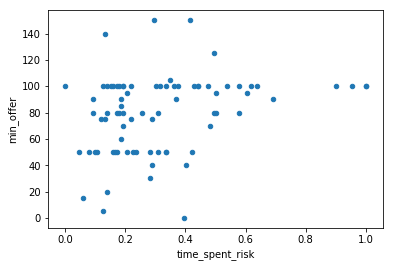

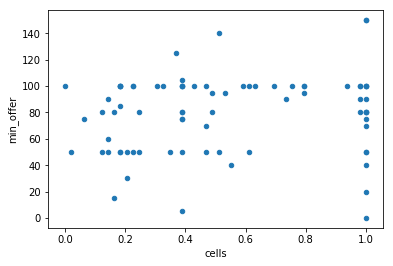

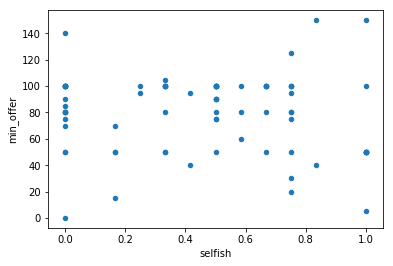

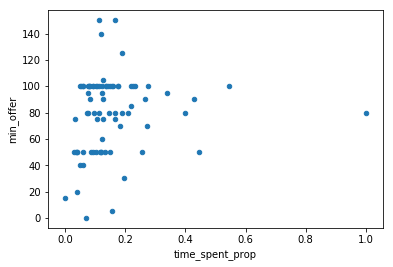

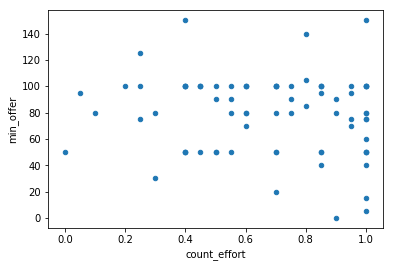

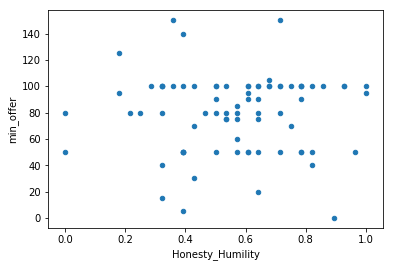

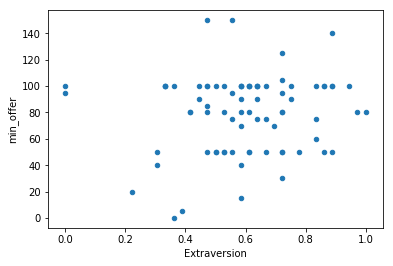

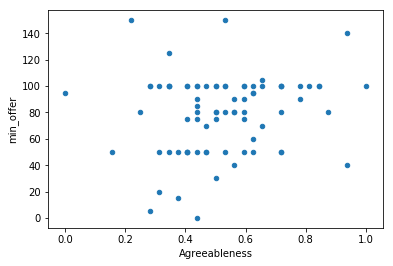

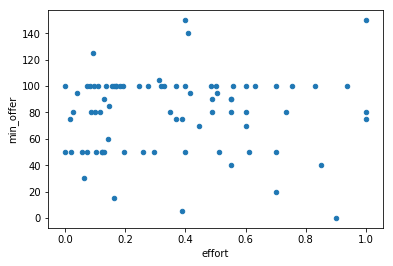

In [3]:
all_cols = list(df.columns) + ['effort']
if 'min_offer' in all_cols:
    all_cols.remove('min_offer')
for col in all_cols:
    if col == 'effort':
        x, y = df_to_xy(df, select_columns=[col], fuse_effort=True)
    else:
        x, y = df_to_xy(df, select_columns=[col])
    x = x.ravel()
    y = y.ravel()
    out_df = pd.DataFrame.from_dict({col:x, 'min_offer':y})
    out_df.plot.scatter(x=col, y='min_offer')

In [15]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, BaggingRegressor
from models import AcceptanceModel

split = int(x.shape[0] * 0.75)
xTrain = x[:split].reshape(-1, 1)
yTrain = y[:split]
xTest = x[split:].reshape(-1, 1)
yTest = y[split:]
model = AcceptanceModel()
model.fit(xTrain, yTrain)

In [27]:
yPred = model.predict(xTest)
yPred

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       105., 100., 105., 100., 100., 105., 100., 100., 100.])

In [28]:
yTrain

array([ 50,  50,  80,  50, 100, 100, 100, 100,  90,  40, 100, 105, 100,
        20,   5,  80, 100,  50, 100,  15, 100,  75, 100,  80, 100, 150,
        75, 100,  90,  50,  50,  50,  60, 100,  80, 100,  50, 125, 100,
        95,  80,  75,   0, 100,  70, 140,  50,  50,  80,  50,  40, 100,
        95,  75,  50,  95, 100, 100, 100])

In [30]:
from models.metrics import gain_mean
gain_mean(yTest, yPred)

94.25